## Setup

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import pyarrow as pa
import polars as pl

import os

## Data

These data come from NYC Open Data - specifically the parquet files can be obtained from [toddwschneider/nyc-taxi-data](https://github.com/toddwschneider/nyc-taxi-data) on GitHub. Then urls for the specific files can be found [here](https://github.com/toddwschneider/nyc-taxi-data/blob/master/setup_files/raw_data_urls.txt).

In [ ]:
#os.listdir(os.path.expanduser("~/Scratch/nyc_taxi/"))

In [ ]:
df_eager = pl.read_parquet("~/Scratch/nyc_taxi/yellow_tripdata_2022-*.parquet")
df_eager

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,"""N""",142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,"""N""",236,42,1,8.0,0.5,0.5,4.0,0.0,0.3,13.3,0.0,0.0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,"""N""",166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,"""N""",114,68,2,8.0,0.5,0.5,0.0,0.0,0.3,11.8,2.5,0.0
2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.3,1.0,"""N""",68,163,1,23.5,0.5,0.5,3.0,0.0,0.3,30.3,2.5,0.0
1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.3,1.0,"""N""",138,161,1,33.0,3.0,0.5,13.0,6.55,0.3,56.35,2.5,0.0
2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,"""N""",233,87,1,17.0,0.5,0.5,5.2,0.0,0.3,26.0,2.5,0.0
2,2022-01-01 00:13:04,2022-01-01 00:22:45,1.0,2.02,1.0,"""N""",238,152,2,9.0,0.5,0.5,0.0,0.0,0.3,12.8,2.5,0.0
2,2022-01-01 00:30:02,2022-01-01 00:44:49,1.0,2.71,1.0,"""N""",166,236,1,12.0,0.5,0.5,2.25,0.0,0.3,18.05,2.5,0.0


## Demo

In [ ]:
df_eager.select([
      "tpep_pickup_datetime", "tip_amount", "fare_amount", "total_amount"
    ])

In [ ]:
df_eager.filter(
    (pl.col("fare_amount") > 0) &
    (pl.col("tip_amount") > 0)
).select([
    "tpep_pickup_datetime", "tip_amount", "fare_amount", "total_amount",
    (pl.col("tip_amount") / (pl.col("total_amount") - pl.col("tip_amount"))).alias("tip_perc")
]).select(
    pl.all().sort_by("tip_perc")
)


tpep_pickup_datetime,tip_amount,fare_amount,total_amount,tip_perc
datetime[ns],f64,f64,f64,f64
2022-02-05 07:49:26,0.01,500.0,500.31,0.00002
2022-11-09 21:51:13,0.01,496.0,496.31,0.00002
2022-11-06 22:13:30,0.01,495.0,495.31,0.00002
2022-11-02 22:09:46,0.01,490.0,490.31,0.00002
2022-11-11 23:32:51,0.01,490.0,490.31,0.00002
2022-11-04 22:08:54,0.01,487.0,489.81,0.00002
2022-08-19 14:56:34,0.01,450.0,466.56,0.000021
2022-07-05 14:53:07,0.01,400.0,400.31,0.000025
2022-07-08 15:57:56,0.01,350.0,352.06,0.000028


In [ ]:
df_eager.filter(
    (pl.col("fare_amount") > 0) &
    (pl.col("tip_amount") > 0)
).select([
    "tpep_pickup_datetime", "tip_amount", "fare_amount", "total_amount",
    (pl.col("tip_amount") / (pl.col("total_amount") - pl.col("tip_amount"))).alias("tip_perc")
]).select(
    pl.mean("tip_perc").alias("mean"),
    pl.min("tip_perc").alias("min"),
    pl.max("tip_perc").alias("max")
)


mean,min,max
f64,f64,f64
0.195446,0.00002,1612.903226


In [ ]:
    df_eager.filter(
      (pl.col("fare_amount") > 0) &
      (pl.col("tip_amount") > 0)
    ).select([
      "tpep_pickup_datetime", "tip_amount", "fare_amount", "total_amount",
      (pl.col("tip_amount") / (pl.col("total_amount") - pl.col("tip_amount"))).alias("tip_perc"),
      pl.col("tpep_pickup_datetime").dt.hour().alias("hour"),
      pl.col("tpep_pickup_datetime").dt.weekday().alias("wday")
    ]).groupby(
      ["hour","wday"]
    ).agg([
      pl.mean("tip_perc").alias("mean_tip_perc")
    ]).with_columns([
      pl.col("mean_tip_perc").round(3)
    ]).with_columns([
      pl.all().sort_by(["wday", "hour"])
    ]).pivot(
      values="mean_tip_perc", index="wday", columns="hour"
    )

wday,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,0.199,0.202,0.218,0.216,0.206,0.196,0.19,0.19,0.191,0.195,0.202,0.198,0.199,0.204,0.197,0.197,0.193,0.194,0.192,0.194,0.194,0.196,0.194,0.196
2,0.199,0.203,0.208,0.212,0.211,0.196,0.193,0.193,0.191,0.195,0.199,0.201,0.198,0.199,0.198,0.196,0.195,0.192,0.192,0.193,0.194,0.196,0.195,0.195
3,0.2,0.203,0.211,0.215,0.208,0.2,0.194,0.191,0.191,0.195,0.197,0.198,0.197,0.199,0.197,0.196,0.194,0.192,0.191,0.191,0.194,0.195,0.196,0.195
4,0.203,0.205,0.211,0.214,0.209,0.199,0.192,0.192,0.192,0.195,0.197,0.197,0.198,0.199,0.197,0.197,0.194,0.193,0.192,0.192,0.193,0.194,0.196,0.195
5,0.195,0.201,0.204,0.208,0.214,0.201,0.194,0.191,0.193,0.196,0.197,0.201,0.198,0.198,0.197,0.196,0.194,0.193,0.192,0.191,0.192,0.195,0.194,0.192
6,0.192,0.194,0.197,0.201,0.207,0.298,0.201,0.201,0.2,0.199,0.202,0.197,0.196,0.196,0.196,0.196,0.196,0.197,0.195,0.195,0.191,0.192,0.192,0.192
7,0.195,0.195,0.195,0.198,0.215,0.212,0.199,0.2,0.2,0.198,0.198,0.197,0.197,0.196,0.195,0.197,0.195,0.195,0.196,0.196,0.194,0.193,0.194,0.195


## Lazy data

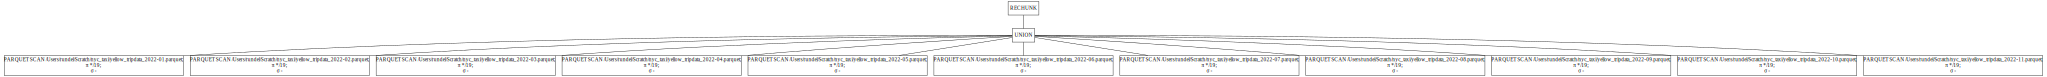

In [ ]:
df_lazy  = pl.scan_parquet("~/Scratch/nyc_taxi/yellow_tripdata_2022-*.parquet")
df_lazy.show_graph()

## Performance

In [ ]:
def lazy():
    df_lazy.filter(
      (pl.col("fare_amount") > 0) &
      (pl.col("tip_amount") > 0)
    ).select([
      "tpep_pickup_datetime", "tip_amount", "fare_amount", "total_amount",
      (pl.col("tip_amount") / (pl.col("total_amount") - pl.col("tip_amount"))).alias("tip_perc"),
      pl.col("tpep_pickup_datetime").dt.hour().alias("hour"),
      pl.col("tpep_pickup_datetime").dt.weekday().alias("wday")
    ]).groupby(
      ["hour","wday"]
    ).agg([
      pl.mean("tip_perc").alias("mean_tip_perc")
    ]).with_columns([
      pl.col("mean_tip_perc").round(3)
    ]).with_columns([
      pl.all().sort_by(["wday", "hour"])
    ]).collect(
    ).pivot(
      values="mean_tip_perc", index="wday", columns="hour"
    )

def eager():
    df_eager.filter(
      (pl.col("fare_amount") > 0) &
      (pl.col("tip_amount") > 0)
    ).select([
      "tpep_pickup_datetime", "tip_amount", "fare_amount", "total_amount",
      (pl.col("tip_amount") / (pl.col("total_amount") - pl.col("tip_amount"))).alias("tip_perc"),
      pl.col("tpep_pickup_datetime").dt.hour().alias("hour"),
      pl.col("tpep_pickup_datetime").dt.weekday().alias("wday")
    ]).groupby(
      ["hour","wday"]
    ).agg([
      pl.mean("tip_perc").alias("mean_tip_perc")
    ]).with_columns([
      pl.col("mean_tip_perc").round(3)
    ]).with_columns([
      pl.all().sort_by(["wday", "hour"])
    ]).pivot(
      values="mean_tip_perc", index="wday", columns="hour"
    )

In [ ]:
%timeit lazy()

PARTITIONED DS
PARTITIONED DS
PARTITIONED DS
PARTITIONED DS
PARTITIONED DS
PARTITIONED DS
PARTITIONED DS


702 ms ± 27.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


PARTITIONED DS


In [ ]:
%timeit eager()

2.79 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
